<div class='alert' style='background-color: #1c1a1e; color: #f5f4f0; padding:16px 26px; border-radius:20px; font-size:40px;'><B>Project Name</b> - First Notebook </div>
<div style='margin:0px 26px; color:#1c1a1e; font-size:16px;'>
<ol>
<li><B>Notebook Documentation</B>: Documenting a Jupyter Notebook is crucial for ensuring that the analysis it contains is understandable and reproducible, not only by others but also by your future self.  
Best practices in documentation start with a clear, informative introduction: what the notebook aims to achieve, the dataset being used, and any prerequisite knowledge or context needed to follow the analysis.  
Each cell, especially those containing key computations or decisions, should be accompanied by Markdown cells explaining the rationale behind the code, any assumptions made, and a summary of the results. Inline comments within the code cells can clarify complex lines of code or non-obvious steps.  
Visualizations should include titles, axis labels, and legends where appropriate to make them self-explanatory. Finally, the notebook should conclude with a summary of findings, any conclusions drawn, and possible next steps. This narrative structure turns your notebook from a mere collection of code cells into a coherent story about your data analysis journey.
</ol>
</div>

# Libraries & Data

In [8]:
# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import datetime 
import os 

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading Data

In [9]:
%pwd

'/Users/janduplessis/code/janduplessis883/project-streamlit_experiment/notebooks'

In [10]:
data = pd.read_parquet('../streamlit_exp/data/gpreviews_sa.parquet')
data.head(2)

,ode,Practice_Name,star_rating,title,comment,PCN,Region,ICB,comment_len,sentiment,sentiment_score,time
0,Y01163,West Coker Surgery,5.0,Friendly staff,Pharmacy and all staff extremely helpful. No ...,None,South West,NHS Somerset ICB,22,positive,0.932635,2022-01-01
1,Y01163,West Coker Surgery,1.0,"Uncaring, rude and disrespectful reception staff",I have visited the reception about 7 times in ...,None,South West,NHS Somerset ICB,143,negative,0.534633,2022-01-01


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46424 entries, 0 to 47285
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ode              46424 non-null  object        
 1   Practice_Name    46424 non-null  object        
 2   star_rating      46424 non-null  float64       
 3   title            46423 non-null  object        
 4   comment          46420 non-null  object        
 5   PCN              46232 non-null  object        
 6   Region           46424 non-null  object        
 7   ICB              46424 non-null  object        
 8   comment_len      46424 non-null  int64         
 9   sentiment        46424 non-null  object        
 10  sentiment_score  46424 non-null  float64       
 11  time             46424 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 4.6+ MB


In [12]:
data.isna().sum()

ode                  0
Practice_Name        0
star_rating          0
title                1
comment              4
PCN                192
Region               0
ICB                  0
comment_len          0
sentiment            0
sentiment_score      0
time                 0
dtype: int64

# Exploratory Analysis

In [16]:
data.dropna(subset="PCN", inplace=True)

In [17]:
data.shape

(46232, 12)

In [25]:
data.to_parquet('../streamlit_exp/data/gpreviews_sa.parquet')

## Plot of reviews over time

In [56]:
data = pd.read_parquet('../streamlit_exp/data/gpreviews_sa.parquet')
data.head(2)

,ode,Practice_Name,star_rating,title,comment,PCN,Region,ICB,comment_len,sentiment,sentiment_score,time
0,Y01163,West Coker Surgery,5.0,Friendly staff,Pharmacy and all staff extremely helpful. No ...,None,South West,NHS Somerset ICB,22,positive,0.932635,2022-01-01
1,Y01163,West Coker Surgery,1.0,"Uncaring, rude and disrespectful reception staff",I have visited the reception about 7 times in ...,None,South West,NHS Somerset ICB,143,negative,0.534633,2022-01-01


In [57]:
ts = data.copy()

In [58]:
#ts.set_index('time', inplace=True)

In [59]:
ts.head(2)

,ode,Practice_Name,star_rating,title,comment,PCN,Region,ICB,comment_len,sentiment,sentiment_score,time
0,Y01163,West Coker Surgery,5.0,Friendly staff,Pharmacy and all staff extremely helpful. No ...,None,South West,NHS Somerset ICB,22,positive,0.932635,2022-01-01
1,Y01163,West Coker Surgery,1.0,"Uncaring, rude and disrespectful reception staff",I have visited the reception about 7 times in ...,None,South West,NHS Somerset ICB,143,negative,0.534633,2022-01-01


In [60]:
ts_df = ts.resample("M", on='time').size()

ts_df

time
2022-01-31    1435
2022-02-28    1498
2022-03-31    1590
2022-04-30    1348
2022-05-31    1659
2022-06-30    1613
2022-07-31    1623
2022-08-31    1710
2022-09-30    1815
2022-10-31    2283
2022-11-30    2076
2022-12-31    1821
2023-01-31    2289
2023-02-28    2086
2023-03-31    2530
2023-04-30    1922
2023-05-31    2026
2023-06-30    2188
2023-07-31    2036
2023-08-31    1825
2023-09-30    1751
2023-10-31    2401
2023-11-30    2008
2023-12-31    1635
2024-01-31    1256
Freq: ME, dtype: int64

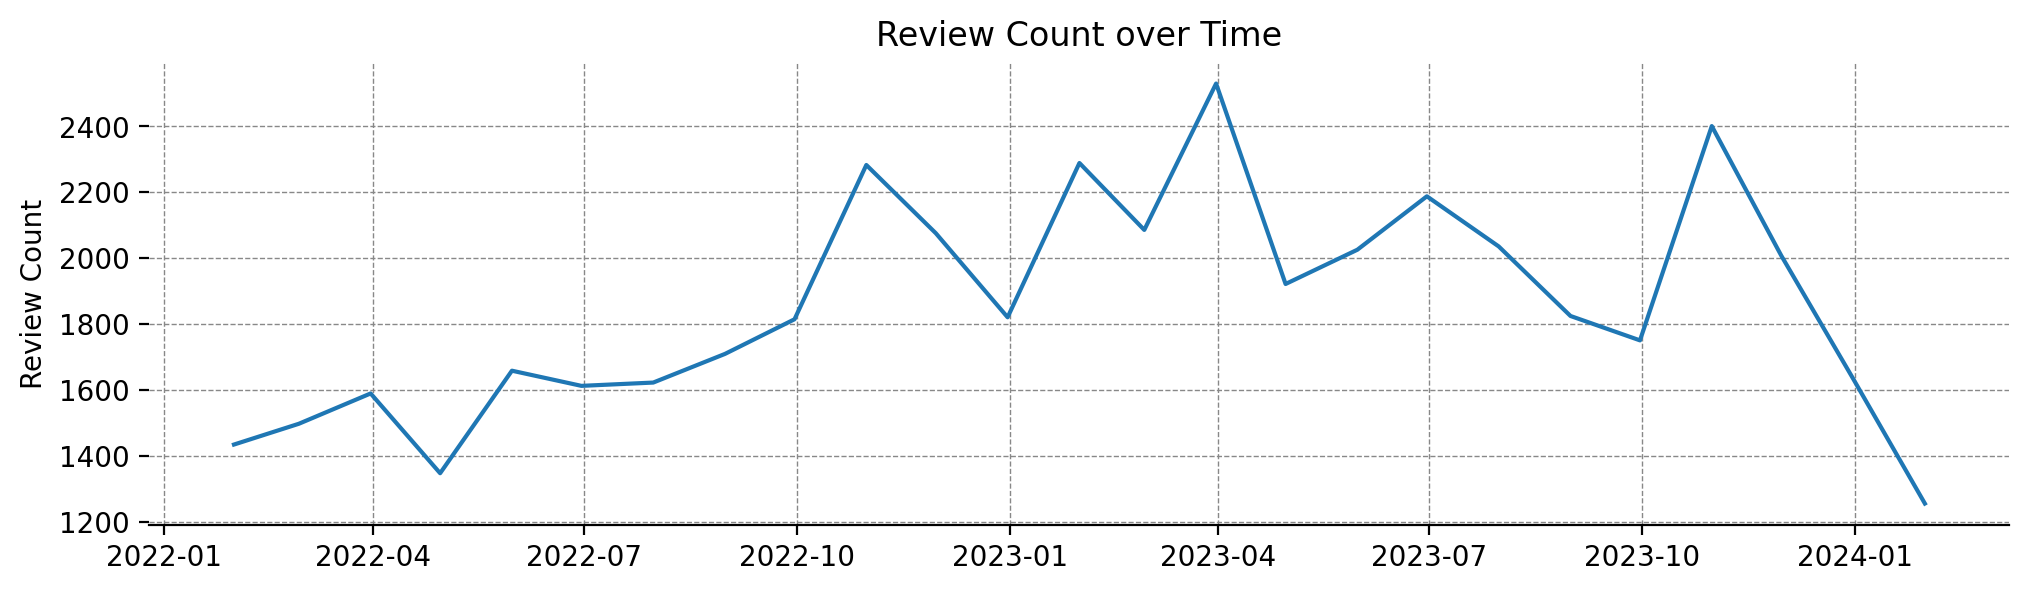

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3)) 
sns.lineplot(data=ts_df, ax=ax)
ax.set_xlabel("")  # Assuming you want no label, if you do, replace "" with your label
ax.set_ylabel("Review Count")

# Adding grid, removing spines
ax.yaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.xaxis.grid(True, linestyle="--", linewidth=0.5, color="#888888")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title("Review Count over Time")
plt.show() 